# Exploring Reglarization, dropout -- Prevent overfitting

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf
from keras.regularizers import l1_l2,l1,l2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Data Augmentation: This is modifying characteristics of data so that the model is not biased and it dosent overfit. Here, we have made sure the images are received in uniform 224 x 224 size and have been rescaled/normalized along with some image processing like flip,rotation etc. This makes sure that each image is of the same format and even if the image is a bit out of format, it is corrected. This way, data Augmentation ensures that the model receives uniform data and prevents overfitting,underfitting or bias on a particular class

In [12]:
# Define the paths to the train, validation, and test sets
train_dir = r'E:\VIT-RATISH\SEMESTER-5-2024-JUL\DL LAB\Assignments\split_ttv_dataset_type_of_plants\Train_Set_Folder'
validation_dir = r'E:\VIT-RATISH\SEMESTER-5-2024-JUL\DL LAB\Assignments\split_ttv_dataset_type_of_plants\Validation_Set_Folder'
test_dir = r'E:\VIT-RATISH\SEMESTER-5-2024-JUL\DL LAB\Assignments\split_ttv_dataset_type_of_plants\Test_Set_Folder'

# Define the image dimensions
img_width, img_height = 224, 224

# Define the batch size
batch_size = 16

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Create an ImageDataGenerator for validation and test data
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load and preprocess the validation data
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Get the number of classes
num_classes = len(train_generator.class_indices)

print(f'Number of classes: {num_classes}')
print(f'Training data: {train_generator.samples} samples')
print(f'Validation data: {validation_generator.samples} samples')
print(f'Test data: {test_generator.samples} samples')

Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.
Found 2998 images belonging to 30 classes.
Number of classes: 30
Training data: 23972 samples
Validation data: 3030 samples
Test data: 2998 samples


In [4]:
def plotit(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.35, 0.5])
    plt.legend(loc='lower right')
    plt.show()  


In [5]:
def evalu(model):
    loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)


## Normal Training

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

### This is also a case of early stopping, as after 7 epochs there was no significant improvement in accuracy

In [13]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/15
1498/1498 [==============================] - 327s 218ms/step - loss: 2.2495 - accuracy: 0.3006 - val_loss: 2.0670 - val_accuracy: 0.3598
Epoch 2/15
1498/1498 [==============================] - 283s 189ms/step - loss: 1.8047 - accuracy: 0.4295 - val_loss: 1.7132 - val_accuracy: 0.4904
Epoch 3/15
1498/1498 [==============================] - 262s 175ms/step - loss: 1.5649 - accuracy: 0.5023 - val_loss: 1.4262 - val_accuracy: 0.5489
Epoch 4/15
1498/1498 [==============================] - 251s 168ms/step - loss: 1.4408 - accuracy: 0.5384 - val_loss: 1.4125 - val_accuracy: 0.5582
Epoch 5/15
1498/1498 [==============================] - 261s 174ms/step - loss: 1.3361 - accuracy: 0.5702 - val_loss: 1.2108 - val_accuracy: 0.6124
Epoch 6/15
1498/1498 [==============================] - 264s 176ms/step - loss: 1.2434 - accuracy: 0.5976 - val_loss: 1.1538 - val_accuracy: 0.6263
Epoch 7/15
1498/1498 [==============================] - 250s 167ms/step - loss: 1.1619 - accuracy: 0.6221 - val_

KeyboardInterrupt: 

In [15]:
evalu(model)

187/187 [==============================] - 20s 108ms/step - loss: 1.0269 - accuracy: 0.6708


## Regularized Training

In [66]:

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.0055)))
model1.add(Dense(30, activation='softmax', kernel_regularizer=l2(0.0055)))

model1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history1 = model1.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/5
1498/1498 [==============================] - 263s 175ms/step - loss: 11.6773 - accuracy: 0.0704 - val_loss: 10.4576 - val_accuracy: 0.1035
Epoch 2/5
1498/1498 [==============================] - 276s 184ms/step - loss: 10.0927 - accuracy: 0.1469 - val_loss: 9.9252 - val_accuracy: 0.1941
Epoch 3/5
1498/1498 [==============================] - 273s 182ms/step - loss: 9.7799 - accuracy: 0.2228 - val_loss: 9.7505 - val_accuracy: 0.2083
Epoch 4/5
1498/1498 [==============================] - 268s 179ms/step - loss: 9.5018 - accuracy: 0.2632 - val_loss: 9.4098 - val_accuracy: 0.2761
Epoch 5/5
1498/1498 [==============================] - 275s 183ms/step - loss: 9.3908 - accuracy: 0.2728 - val_loss: 9.3238 - val_accuracy: 0.2897


### Regularizations either L1 or L2 or both, tend to decrase accuracy to prevent overfitting. Here, the data is huge. The chances of overfitting is less . Still, with enough epochs it will overfit. Here each epoch takes 6 minutes, so we do have a constraint here that prevents us to see full results.

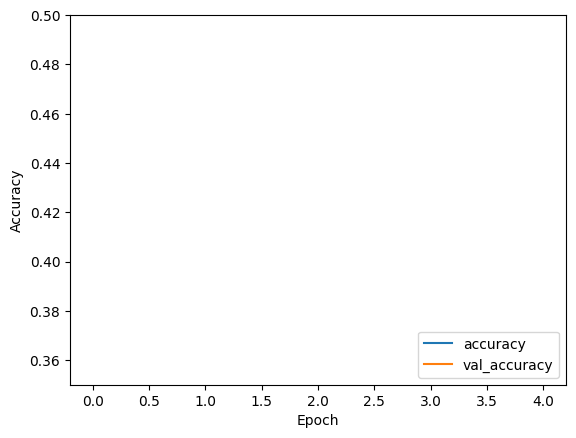

In [67]:
plotit(history1)#negligible accuracy

In [68]:
evalu(model1)

187/187 [==============================] - 6s 31ms/step - loss: 9.3304 - accuracy: 0.2861


## Dropout training

In [69]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))  # dropout 20% of the neurons
model2.add(Dense(30, activation='softmax'))
model2.add(Dropout(0.2))  # dropout 20% of the neurons

model2.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [70]:
history2 = model1.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
1498/1498 [==============================] - 276s 184ms/step - loss: 9.3207 - accuracy: 0.2855 - val_loss: 9.2125 - val_accuracy: 0.3271
Epoch 2/10
1498/1498 [==============================] - 279s 186ms/step - loss: 9.2667 - accuracy: 0.2971 - val_loss: 9.1645 - val_accuracy: 0.3254
Epoch 3/10
1498/1498 [==============================] - 281s 187ms/step - loss: 9.2528 - accuracy: 0.2972 - val_loss: 9.2163 - val_accuracy: 0.3181
Epoch 4/10
1498/1498 [==============================] - 270s 180ms/step - loss: 9.2226 - accuracy: 0.3057 - val_loss: 9.2898 - val_accuracy: 0.3065
Epoch 5/10
1498/1498 [==============================] - 290s 194ms/step - loss: 9.2334 - accuracy: 0.3094 - val_loss: 9.2801 - val_accuracy: 0.3065
Epoch 6/10
1498/1498 [==============================] - 273s 182ms/step - loss: 9.1995 - accuracy: 0.3165 - val_loss: 9.1437 - val_accuracy: 0.3290
Epoch 7/10
1498/1498 [==============================] - 266s 177ms/step - loss: 9.1913 - accuracy: 0.3207 - val_

### Dropout layers put off some neurons so the the data does not overfit. We can clearly see the reduction in accuracy even with 10 epochs due t dropout layers. In this case, dropout might not be necessary, but when training Big Data on a large scale, with high-end computes and 1000s of epochs, droput layers ensure that there is no overfitting

# Saving the model as .h5

In [18]:

model.save('model.h5', include_optimizer=True)


# code to implement. Replace imgpath with yours

In [21]:
model = tf.keras.models.load_model('model.h5')
img_path = r'E:\VIT-RATISH\SEMESTER-5-2024-JUL\DL LAB\Assignments\split_ttv_dataset_type_of_plants\Test_Set_Folder\banana\aug_0_942.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = train_datagen.random_transform(img_array)
img_array = np.expand_dims(img_array, axis=0)
preds = model.predict(img_array)
pred_class = np.argmax(preds, axis=1)
# class_label = list(class_indices.keys())[list(class_indices.values()).index(pred_class)]
print(f'Predicted class: {pred_class}')
# print(f'Predicted class label: {class_label}')



1/1 [==============================] - 0s 56ms/step
Predicted class: [1]


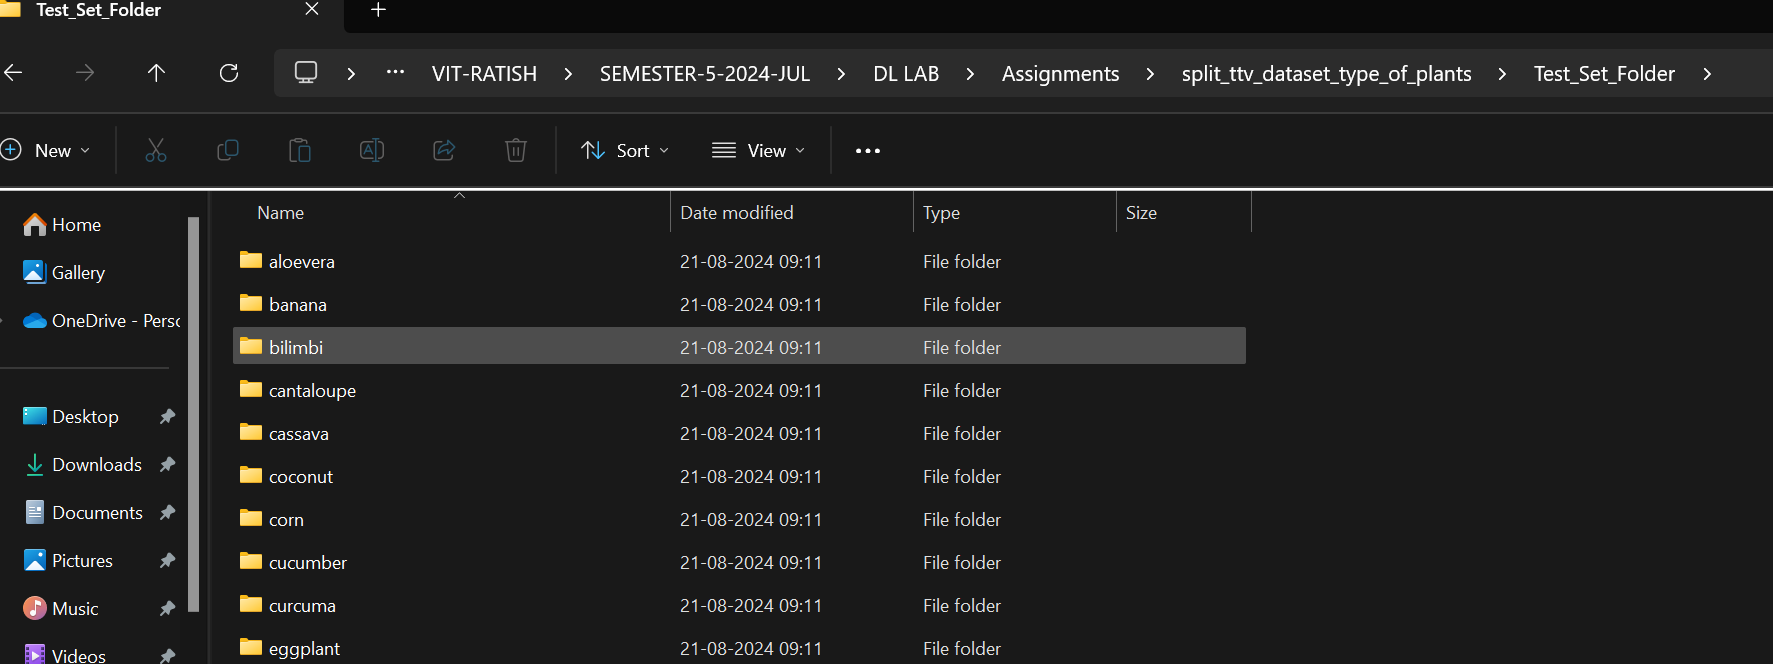  
# Which is banana as expected